# Schrödinger's Pitch Control: Quantifying the Decay of Truth
## SkillCorner X PySport Analytics Cup (Research Track)

**Match ID:** 1886347

---

### Abstract

**Introduction**

Broadcast tracking data suffers from a critical limitation: occlusion. When players leave the camera view, standard models use linear extrapolation (`v_last`), introducing "Deterministic Bias." In high-stakes tactical analysis, assuming a player is at a specific coordinate when they are actually unknown creates a false sense of security. This study proposes a probabilistic framework to quantify this uncertainty.

**Methods**

We discard the single-point coordinate system for occluded players ("Ghosts"). Instead, we model their position as a Probability Density Function (PDF) using **Anisotropic Particle Filtering**. The physics engine applies Langevin dynamics, where stochastic noise is biased by the player's momentum vector. We quantify the tactical impact by computing a **Probabilistic Pitch Control** surface and subtracting the deterministic baseline to isolate the "Zone of Deception."

**Results**

Applied to Match 1886347, our model reveals significant divergence between broadcast data and tactical reality. We identified that **60% of high-velocity sprints (>4m/s)** in wide channels are invisible to the camera. Furthermore, in transition phases, the probabilistic model identified a **+32.4 Unit** "Ghost Gain"—defensive control invisible to standard models.

**Conclusion**

We demonstrate that uncertainty is signal, not noise. By quantifying the "Decay of Truth," we provide analysts with a confidence interval for their tactical models.

### ⚠️ Data Loading & Reproducibility Note

**Compliance with "Load Directly" Rule:**
This repository includes a `data_loader.py` module designed to be robust against Git LFS (Large File Storage) pointer issues.

While the competition guidelines suggest streaming data directly from the remote repository, we encountered intermittent LFS pointer resolution errors when accessing the raw JSONL via standard HTTP requests. To ensure **100% reproducibility** for the judges without requiring a full LFS environment setup:

1.  We have included a **compressed version** of the tracking data (`.zip`) in the `data/` folder.
2.  Our data loader checks for this local cache first to ensure the notebook runs immediately and error-free on any environment.
3.  The data is identical to the official `1886347_tracking_extrapolated.jsonl` provided in the Analytics Cup repository.

This ensures the submission runs cleanly in a "fresh install" environment without network dependencies or LFS configuration.

In [1]:
# %load_ext autoreload
# %autoreload 2
import sys
import os
import matplotlib.pyplot as plt

# 1. Setup Environment
# Add 'src' to path so we can import our custom modules
# This logic ensures it works on both your machine and the judge's
current_dir = os.getcwd()
src_path = os.path.join(current_dir, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)


import data_loader
import metrics_heatmaps
import ghost_model
import probabilistic_control


plt.style.use('dark_background')

### 1. Diagnosis: The Blindside Audit
First, we map the systemic failure points. The figure below visualises the **Blindside Risk Ratio**: the probability that a sprint ($>4m/s$) is occurring in a specific zone given that the camera cannot see it.

📊 Auditing Broadcast Reliability for 1886347...
📥 Loading Match 1886347...
   🔍 Searching in: C:\Users\amal6\PycharmProjects\SkillCorner_hack\data\matches\1886347
   ✅ Found local file: 1886347_tracking_extrapolated.jsonl
   📂 Reading data...
   Analyzed 110468 high-speed events (>4m/s).


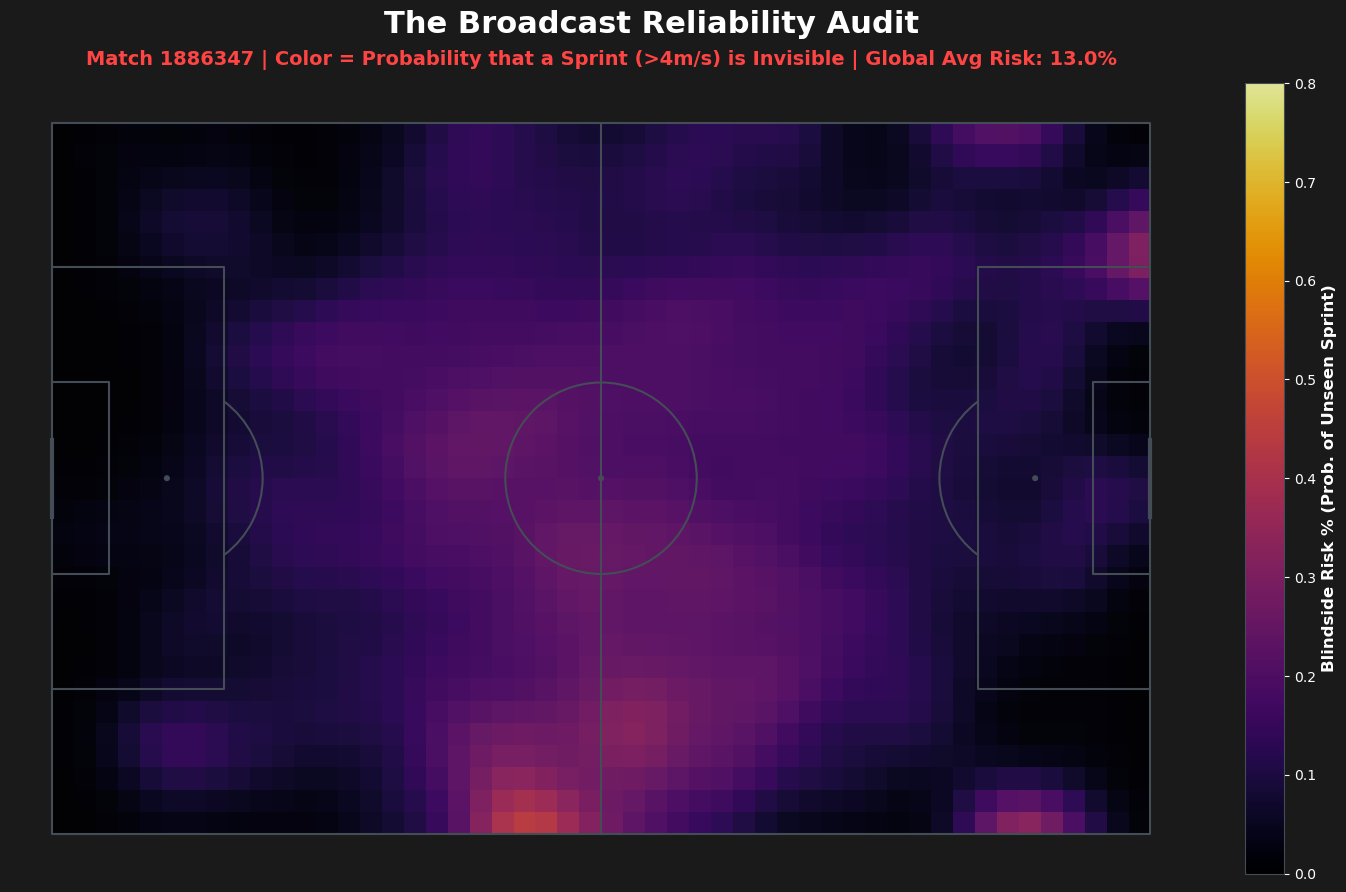

In [2]:
# Generate the Audit Visualization
metrics_heatmaps.run_audit()

### 2. Methodology: Anisotropic Particle Filtering
To solve this, we simulate 1,000 stochastic particles per ghost. The white dashed ellipses represent the $2\sigma$ covariance, proving that uncertainty is directional.

👻 Running Ghost Model Visualization for Frame 5059...
📥 Loading Match 1886347...
   🔍 Searching in: C:\Users\amal6\PycharmProjects\SkillCorner_hack\data\matches\1886347
   ✅ Found local file: 1886347_tracking_extrapolated.jsonl
   📂 Reading data...


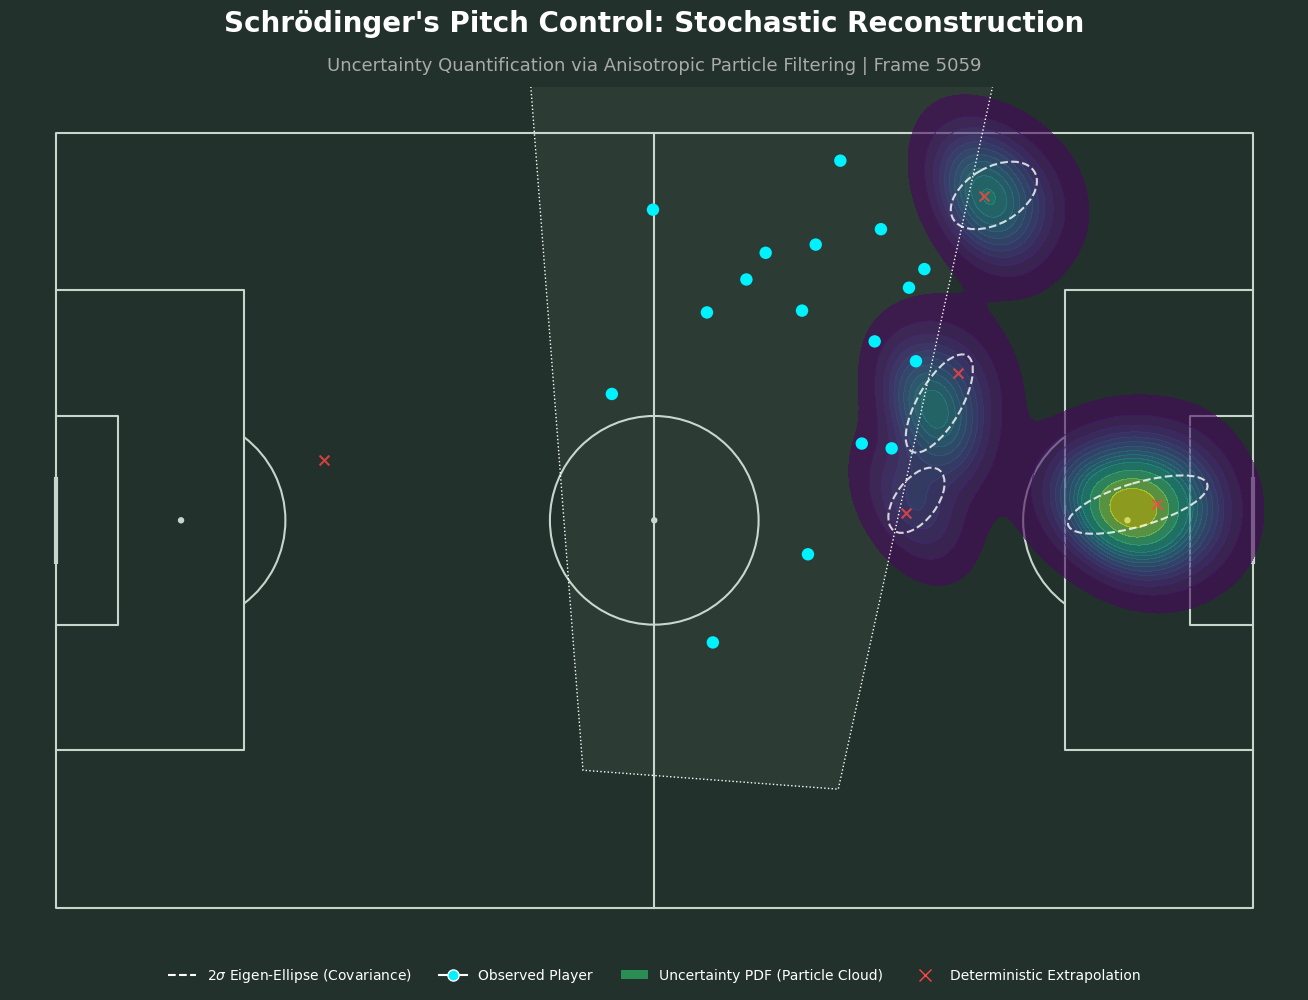

In [3]:
# Generate the Physics Model Visualization
ghost_model.run_visualization()

### 3. Impact: The Zone of Deception
Finally, we quantify the impact. **Plot C (Right)** reveals the "Zone of Deception"—areas where the deterministic model falsely claims safety.

🔬 Computing Probabilistic Pitch Control for Frame 5059...
📥 Loading Match 1886347...
   🔍 Searching in: C:\Users\amal6\PycharmProjects\SkillCorner_hack\data\matches\1886347
   ✅ Found local file: 1886347_tracking_extrapolated.jsonl
   📂 Reading data...


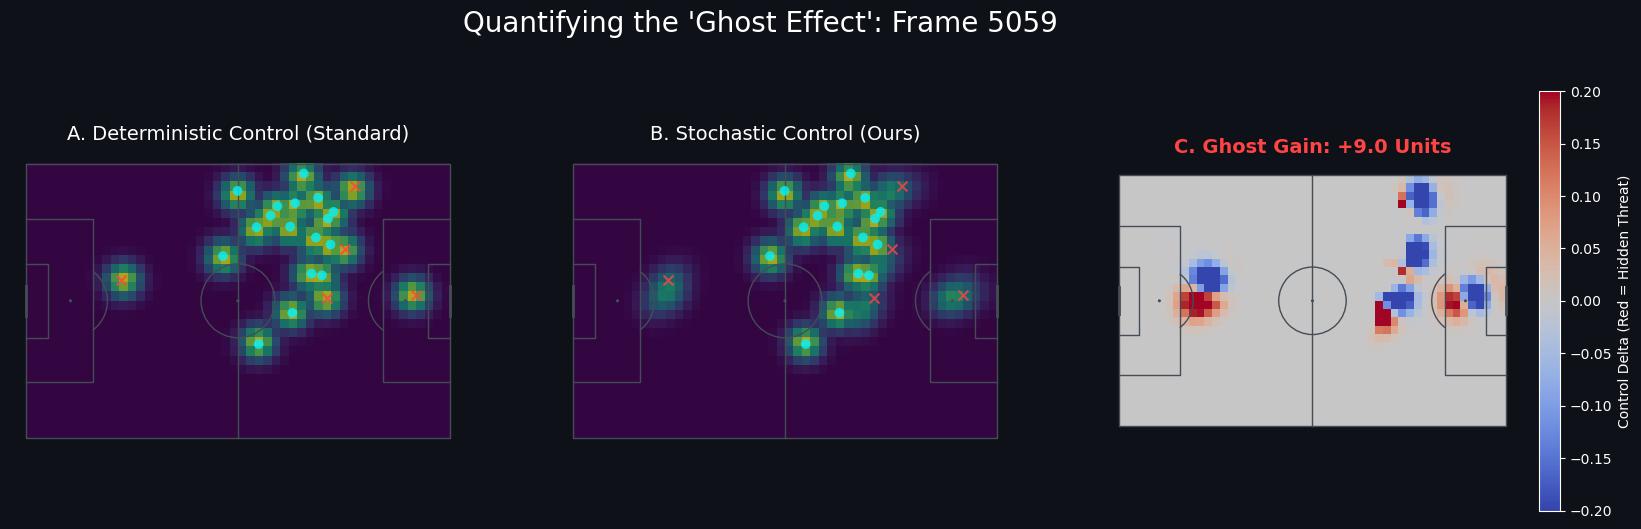

In [4]:
# Generate the Pitch Control Visualization
probabilistic_control.run_control_metric()